# Healthcare Fraud Detection
**by Kristina Liapchin**

# Part 1: Feature Engineering
**Paper Summary**<br>
This week, I read "Improving Fraud and Abuse Detection in General Physician Claims: A Data Mining Study" article, which discusses healthcare fraud and how data mining can be used to detect it. The paper focuses on how fraud and abuse can be detected by looking at physician behavior.

The following are the key insights I got from this reading that also helped me in my EDA:
1. Globally, 10% of GDP of the countries was spent on health in 2011, a lot of which was not spent in the right place, but wasted because of fraud and abuse.
- Healthcare fraud falls into 3 of the following categories:
    - provider fraud
    - customer fraud
    - insurer fraud
2. Traditional auditing procedures in determining healthcare fraud can be very time consuming and ineffective. 
3. Auditors  often miss signs of fraud or abuse because they spend little time investigating the relationships between the variables, which would provide a more comprehensive picture of physician behavior.
4. Data mining can be useful in healthcare fraud detection by discovering previously unknown patterns.
5. Costs, frequency and patterns of visits, and prescription patterns are all important indicators of fraud and abuse.

**Introduction**<br>
In this part, I will be exploring the Medicare provider payment data. The goal of this analysis is to create features that will help in identifying and predicting fraud and abuse of Medicare across the US.

P.S. To help communicate my logic in the best possible way, I grouped multiple features into leads based on the topics I was exploring.

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  2.1.3     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
data = read.csv("/Users/kristinaliapchin/Downloads/inpatientCharges.csv")

In [4]:
head(data)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments
<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,$16920.79,$6653.80,$5374.14


In [5]:
str(data)

'data.frame':	163065 obs. of  12 variables:
 $ DRG.Definition                      : Factor w/ 100 levels "039 - EXTRACRANIAL PROCEDURES W/O CC/MCC",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Provider.Id                         : int  10001 10005 10006 10011 10016 10023 10029 10033 10039 10040 ...
 $ Provider.Name                       : Factor w/ 3201 levels "ABBEVILLE GENERAL HOSPITAL",..: 2519 1499 730 2723 2445 157 687 2960 1133 882 ...
 $ Provider.Street.Address             : Factor w/ 3326 levels "#1 MEDICAL PARK DRIVE",..: 319 1494 1230 2291 87 1266 1165 2632 168 143 ...
 $ Provider.City                       : Factor w/ 1977 levels "ABBEVILLE","ABERDEEN",..: 455 178 583 163 14 1152 1293 163 811 631 ...
 $ Provider.State                      : Factor w/ 51 levels "AK","AL","AR",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Provider.Zip.Code                   : int  36301 35957 35631 35235 35007 36116 36801 35233 35801 35903 ...
 $ Hospital.Referral.Region.Description: Factor w/ 306 levels "AK - Anchorage"

**Cleaning up the data**

In [6]:
# adjusting numeric data types
data$Average.Covered.Charges = as.numeric(gsub('[$,]', '', data$Average.Covered.Charges))
data$Average.Total.Payments = as.numeric(gsub('[$,]', '', data$Average.Total.Payments))
data$Average.Medicare.Payments = as.numeric(gsub('[$,]', '', data$Average.Medicare.Payments))

In [7]:
# adjusting character data types
data$Provider.Name = as.character(data$Provider.Name)
data$Provider.Street.Address = as.character(data$Provider.Street.Address)

In [8]:
# checking for missing values
NA_prcnt = function (data){
    NAs_per_col = colMeans(is.na(data)*100)
    sort(NAs_per_col, decreasing = T)
}

NAs = NA_prcnt(data)
NAs

DRG.Definition                          Provider.Id 
                                   0                                    0 
                       Provider.Name              Provider.Street.Address 
                                   0                                    0 
                       Provider.City                       Provider.State 
                                   0                                    0 
                   Provider.Zip.Code Hospital.Referral.Region.Description 
                                   0                                    0 
                    Total.Discharges              Average.Covered.Charges 
                                   0                                    0 
              Average.Total.Payments            Average.Medicare.Payments 
                                   0                                    0

**Lead 1 - Patient Payment**<br>
To kick things off, I want to add a feature to reflect the remaining part of the average total payments not covered by Medicare. This is important to add because as I learned from some of the reading materials this week that patients can also collaborate with physicians (i.e. providers) when it comes to fraud and abuse.

In [9]:
data = data  %>% 
mutate(Average.Patient.Payments = Average.Total.Payments - Average.Medicare.Payments)

head(data, n = 10)

Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,Average.Patient.Payments
<fct>,<int>,<chr>,<chr>,<fct>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,6653.80,5374.14,1279.66
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11977.13,5834.74,4761.41,1073.33
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09,8031.12,5858.50,2172.62
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,28523.39,6113.38,5228.40,884.98


**Findings:**<br>
As we can see, the remaining part of the payments outside of what medicare covers can vary across providers and across locations. It is important to keep this number in mind as we proceed with further EDA and search for anomalies because this number can be an indication of whether some providers might be engaging in abuse or waste with their patients when it comes to different or specific diagnosis.

**Lead 2 - Benchmarks: summary statistics by state and DRG**<br>
Before proceeding with a more detailed EDA, I wanted to better understand the differences in payments among different locations in the US, since these can vary drastically based on various socio-economic factors. In this step, I am going to create features for the average payments in order to set benchmarks. I will then use those benchmarks to compare the individual providers across states. This will help me find outliers and determine suspicious and potentially fraudulent activity.

First, I will focus on looking at the summary statistics based on the state and DRG.

In [10]:
# building plots to visually examine the states
avg_cc_st = ggplot(data, aes(y = Provider.State,x = Average.Covered.Charges, colour = Average.Covered.Charges))+
            geom_point() +
            labs(title="Average Covered Charge by State")

avg_tp_st = ggplot(data, aes(y = Provider.State,x = Average.Total.Payments  , colour = Average.Total.Payments))+
            geom_point() +
            labs(title="Average Total Payments by State")

avg_mp_st = ggplot(data, aes(y = Provider.State,x = Average.Medicare.Payments  , colour = Average.Medicare.Payments))+
            geom_point() +
            labs(title="Average Medicare Payments by State")

avg_p_st = ggplot(data, aes(y = Provider.State,x = Average.Patient.Payments  , colour = Average.Patient.Payments))+
            geom_point() +
            labs(title="Average Patient Payments by State")

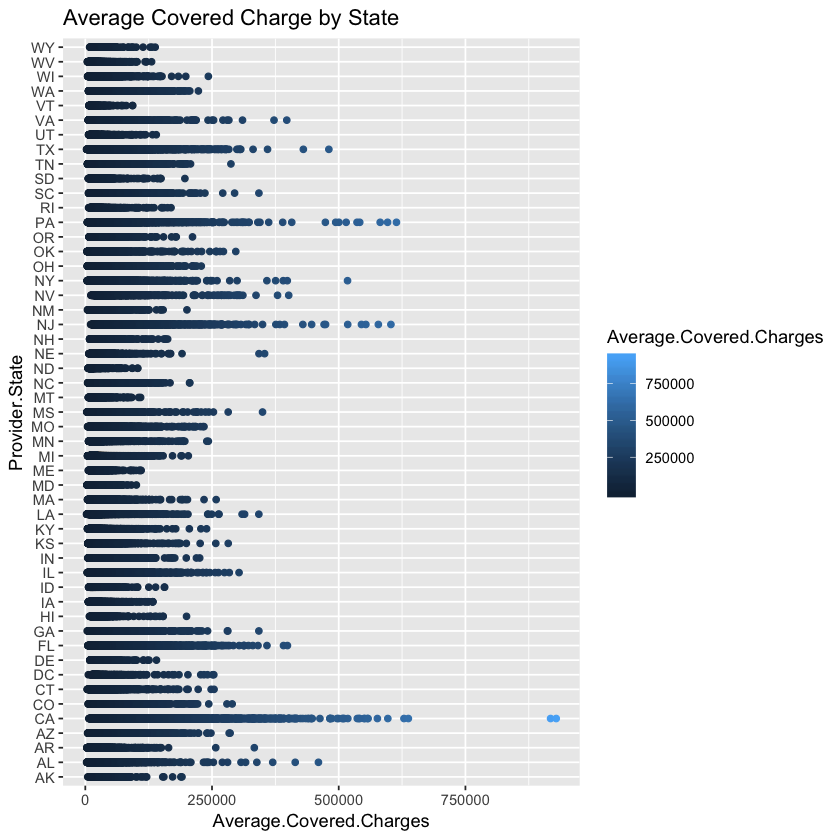

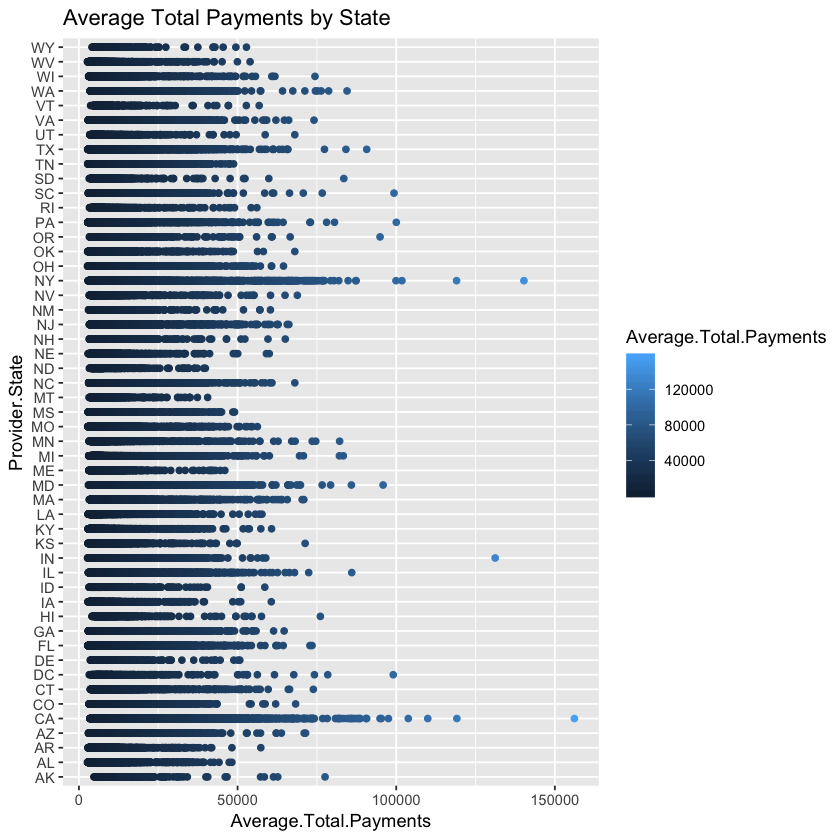

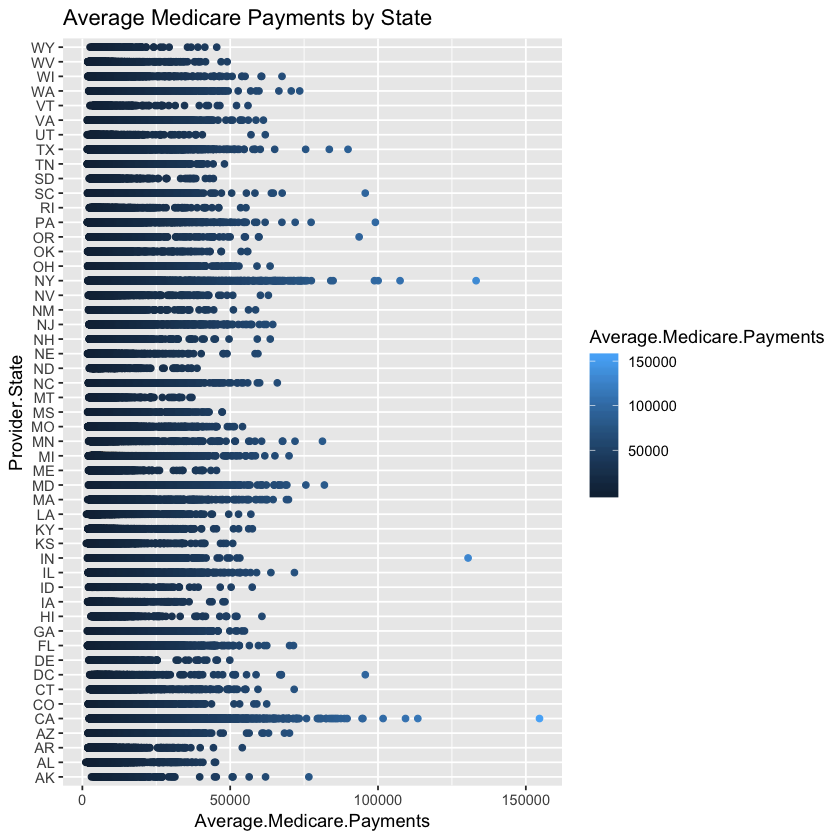

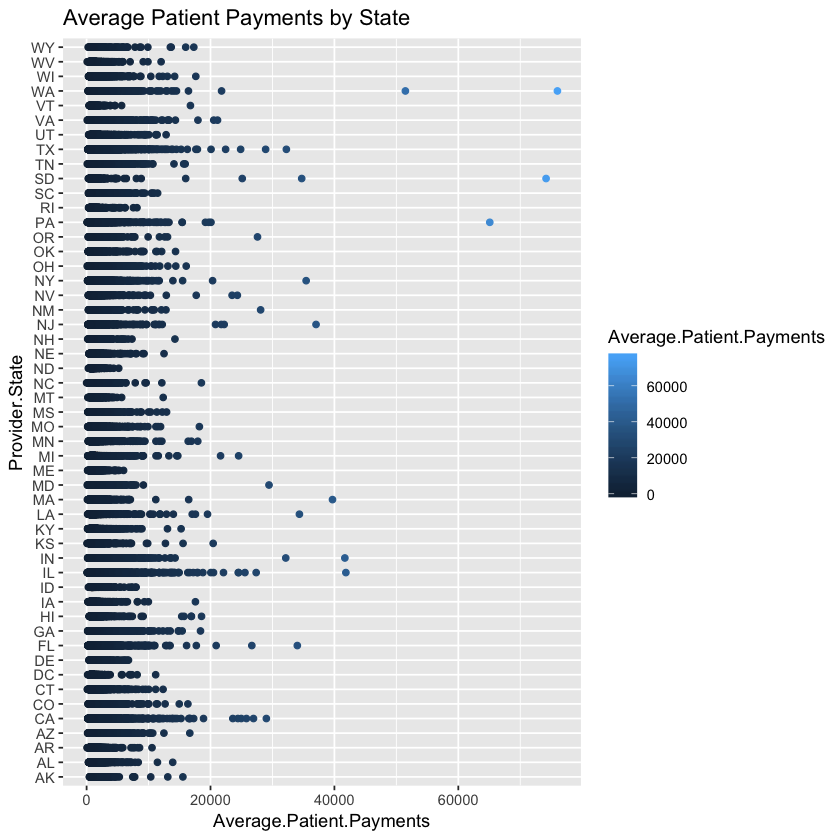

In [11]:
avg_cc_st
avg_tp_st
avg_mp_st
avg_p_st

In [12]:
summary_stats = function (data,group_cols) {
    data %>% 
    group_by_(.dots = group_cols)  %>% 
    summarise(num_providers = n(),
              total_discharges = sum(Total.Discharges),
              avg_discharges = mean(Total.Discharges),
              avg_covered_charge = mean(Average.Covered.Charges),
              avg_total_payments = mean(Average.Total.Payments),
              avg_medicare_payments = mean(Average.Medicare.Payments),
              avg_patient_payments = mean(Average.Patient.Payments))
}


In [13]:
summary_stats_st_drg = summary_stats(data,c('DRG.Definition','Provider.State'))
summary_stats_st_drg = summary_stats_st_drg[order(summary_stats_st_drg$DRG.Definition,summary_stats_st_drg$Provider.State),]
head(summary_stats_st_drg, n = 10)
tail(summary_stats_st_drg, n = 10)

DRG.Definition,Provider.State,num_providers,total_discharges,avg_discharges,avg_covered_charge,avg_total_payments,avg_medicare_payments,avg_patient_payments
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK,1,23,23.00000,34805.13,8401.950,6413.780,1988.170
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,23,879,38.21739,32044.44,5743.612,4599.593,1144.019
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AR,16,652,40.75000,27463.26,6118.829,4938.712,1180.116
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ,24,606,25.25000,33443.36,7271.556,5912.833,1358.723
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA,67,1715,25.59701,56094.93,8387.933,6878.955,1508.978
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CO,10,255,25.50000,35252.21,7051.922,5419.930,1631.992
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CT,15,384,25.60000,21632.01,8010.567,6709.101,1301.466
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,DC,3,47,15.66667,47369.88,9493.973,8110.817,1383.157
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,DE,3,144,48.00000,23966.52,7128.213,5719.317,1408.897


DRG.Definition,Provider.State,num_providers,total_discharges,avg_discharges,avg_covered_charge,avg_total_payments,avg_medicare_payments,avg_patient_payments
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
948 - SIGNS & SYMPTOMS W/O MCC,SD,5,130,26.00000,16095.04,4823.126,3894.936,928.1900
948 - SIGNS & SYMPTOMS W/O MCC,TN,45,1199,26.64444,15232.03,4105.724,3127.933,977.7909
948 - SIGNS & SYMPTOMS W/O MCC,TX,116,2947,25.40517,21210.97,4631.004,3738.930,892.0742
948 - SIGNS & SYMPTOMS W/O MCC,UT,9,158,17.55556,13265.95,4616.941,3573.382,1043.5589
948 - SIGNS & SYMPTOMS W/O MCC,VA,46,1251,27.19565,14738.60,4295.247,3372.683,922.5641
948 - SIGNS & SYMPTOMS W/O MCC,VT,3,58,19.33333,12392.52,6233.893,5270.430,963.4633
948 - SIGNS & SYMPTOMS W/O MCC,WA,30,684,22.80000,18737.71,5140.299,3883.211,1257.0873
948 - SIGNS & SYMPTOMS W/O MCC,WI,39,1069,27.41026,14359.07,4633.002,3587.934,1045.0679
948 - SIGNS & SYMPTOMS W/O MCC,WV,18,564,31.33333,10098.51,4040.944,3278.828,762.1156


**Findings:**<br>
From the initial plots we see clear variance in charges by providers for the various diagnosis - some states appear to be  more expensive than others, which makes sense overall (e.g. New York and Californa). We also see that some states have more drastic jumps across some of the payments, which appear to be outliers and could provde to be worth looking into.

Therefore, the variables created here focus on individual states and diagnosis (DRG), which can be helpful in identifying the benchmarks for each state and diagnosis. These features give us a good indication of how many providers are in each state, how much traffic they receieve and how the payments for the different diagnosis vary. We could use these features to compare the individual DRG Medicare payments across states and determine patterns in patients getting specific treatments in specific states more than in others.

What is more interesting to see, however, is how individual providers compare against that benchmark and this is what I am going to do in the next step.

**Lead 3 - Individual provider differences: by state and DRG**<br>
In this step, I will be kooking into how individual providers measure against the benchmarks we've created to find any potential outliers. I will be creating features to help me find the statistics ofr individual providers, as well as to see the delta between those providers and the state average.

In [14]:
#function to get pull individual provider stats
provider_stats = function (data,group_cols) {
    data %>% 
    group_by_(.dots = group_cols)  %>% 
    summarise(avg_actual_discharges = mean(Total.Discharges),
              avg_actual_covered_charge = mean(Average.Covered.Charges),
              avg_actual_total_payments = mean(Average.Total.Payments),
              avg_actual_medicare_payments = mean(Average.Medicare.Payments),
              avg_actual_patient_payments = mean(Average.Patient.Payments))
    
}

In [15]:
summary_st_drg_pr = provider_stats(data,c('DRG.Definition','Provider.State','Provider.Id','Provider.Name'))
summary_st_drg_pr = summary_st_drg_pr[order(summary_st_drg_pr$DRG.Definition,summary_st_drg_pr$Provider.Id,summary_st_drg_pr$Provider.Name),]
head(summary_st_drg_pr, n = 5)
tail(summary_st_drg_pr, n = 5)

DRG.Definition,Provider.State,Provider.Id,Provider.Name,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,avg_actual_medicare_payments,avg_actual_patient_payments
<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10001,SOUTHEAST ALABAMA MEDICAL CENTER,91,32963.07,5777.24,4763.73,1013.51
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10005,MARSHALL MEDICAL CENTER SOUTH,14,15131.85,5787.57,4976.71,810.86
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10006,ELIZA COFFEE MEMORIAL HOSPITAL,24,37560.37,5434.95,4453.79,981.16
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10011,ST VINCENT'S EAST,25,13998.28,5417.56,4129.16,1288.40
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10016,SHELBY BAPTIST MEDICAL CENTER,18,31633.27,5658.33,4851.44,806.89


DRG.Definition,Provider.State,Provider.Id,Provider.Name,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,avg_actual_medicare_payments,avg_actual_patient_payments
<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
948 - SIGNS & SYMPTOMS W/O MCC,TX,670041,SETON MEDICAL CENTER WILLIAMSON,23,26314.39,3806.86,3071.39,735.47
948 - SIGNS & SYMPTOMS W/O MCC,TX,670055,METHODIST STONE OAK HOSPITAL,11,21704.72,4027.36,2649.72,1377.64
948 - SIGNS & SYMPTOMS W/O MCC,TX,670056,SETON MEDICAL CENTER HAYS,19,39121.73,5704.36,4058.36,1646.00
948 - SIGNS & SYMPTOMS W/O MCC,TX,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,11,28873.09,7663.09,6848.54,814.55
948 - SIGNS & SYMPTOMS W/O MCC,TX,670068,TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND,12,15042.00,3539.75,2887.41,652.34


In [16]:
#joining the dataframes
joined_summary_st_drg_pr = summary_st_drg_pr  %>% 
left_join(summary_stats_st_drg, by = c("Provider.State" = 'Provider.State', 'DRG.Definition' = 'DRG.Definition'))

Warning message:
“`chr_along()` is deprecated as of rlang 0.2.0.
This warning is displayed once per session.”

In [17]:
#adding differences for individual providers
summary_st_drg_pr = joined_summary_st_drg_pr  %>% 
mutate(diff_discharges = avg_actual_discharges - avg_discharges,
       diff_covered_charges = avg_actual_covered_charge - avg_covered_charge,
       diff_total_payment = avg_actual_total_payments - avg_total_payments,
       diff_medicare_payment = avg_actual_medicare_payments - avg_medicare_payments,
      diff_patient_payment = avg_actual_patient_payments - avg_patient_payments)

In [18]:
summary_st_drg_pr = summary_st_drg_pr  %>% 
select(-c(total_discharges,avg_discharges,avg_covered_charge,avg_total_payments,avg_medicare_payments,avg_patient_payments,num_providers))

head(summary_st_drg_pr, n =10)
tail(summary_st_drg_pr, n =10)

DRG.Definition,Provider.State,Provider.Id,Provider.Name,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,avg_actual_medicare_payments,avg_actual_patient_payments,diff_discharges,diff_covered_charges,diff_total_payment,diff_medicare_payment,diff_patient_payment
<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10001,SOUTHEAST ALABAMA MEDICAL CENTER,91,32963.07,5777.24,4763.73,1013.51,52.782609,918.633,33.62826,164.137,-130.5087
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10005,MARSHALL MEDICAL CENTER SOUTH,14,15131.85,5787.57,4976.71,810.86,-24.217391,-16912.587,43.95826,377.117,-333.1587
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10006,ELIZA COFFEE MEMORIAL HOSPITAL,24,37560.37,5434.95,4453.79,981.16,-14.217391,5515.933,-308.66174,-145.803,-162.8587
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10011,ST VINCENT'S EAST,25,13998.28,5417.56,4129.16,1288.40,-13.217391,-18046.157,-326.05174,-470.433,144.3813
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10016,SHELBY BAPTIST MEDICAL CENTER,18,31633.27,5658.33,4851.44,806.89,-20.217391,-411.167,-85.28174,251.847,-337.1287
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10023,BAPTIST MEDICAL CENTER SOUTH,67,16920.79,6653.80,5374.14,1279.66,28.782609,-15123.647,910.18826,774.547,135.6413
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10029,EAST ALABAMA MEDICAL CENTER AND SNF,51,11977.13,5834.74,4761.41,1073.33,12.782609,-20067.307,91.12826,161.817,-70.6887
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10033,UNIVERSITY OF ALABAMA HOSPITAL,32,35841.09,8031.12,5858.50,2172.62,-6.217391,3796.653,2287.50826,1258.907,1028.6013
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,10039,HUNTSVILLE HOSPITAL,135,28523.39,6113.38,5228.40,884.98,96.782609,-3521.047,369.76826,628.807,-259.0387


DRG.Definition,Provider.State,Provider.Id,Provider.Name,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,avg_actual_medicare_payments,avg_actual_patient_payments,diff_discharges,diff_covered_charges,diff_total_payment,diff_medicare_payment,diff_patient_payment
<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
948 - SIGNS & SYMPTOMS W/O MCC,WI,520189,AURORA MED CTR KENOSHA,28,18099.85,4905.17,3403.85,1501.32,0.5897436,3740.7762,272.1677,-184.0844,456.25205
948 - SIGNS & SYMPTOMS W/O MCC,WY,530002,CAMPBELL COUNTY MEMORIAL HOSPITAL,12,13756.50,6889.33,5673.50,1215.83,-3.3333333,792.9067,536.8533,903.7900,-366.93667
948 - SIGNS & SYMPTOMS W/O MCC,WY,530012,WYOMING MEDICAL CENTER,19,12021.42,6192.84,3580.57,2612.27,3.6666667,-942.1733,-159.6367,-1189.1400,1029.50333
948 - SIGNS & SYMPTOMS W/O MCC,WY,530014,CHEYENNE REGIONAL MEDICAL CENTER,15,13112.86,5975.26,5055.06,920.20,-0.3333333,149.2667,-377.2167,285.3500,-662.56667
948 - SIGNS & SYMPTOMS W/O MCC,TX,670024,NORTH CYPRESS MEDICAL CENTER,23,34774.21,3772.00,3085.73,686.27,-2.4051724,13563.2371,-859.0040,-653.1997,-205.80422
948 - SIGNS & SYMPTOMS W/O MCC,TX,670041,SETON MEDICAL CENTER WILLIAMSON,23,26314.39,3806.86,3071.39,735.47,-2.4051724,5103.4171,-824.1440,-667.5397,-156.60422
948 - SIGNS & SYMPTOMS W/O MCC,TX,670055,METHODIST STONE OAK HOSPITAL,11,21704.72,4027.36,2649.72,1377.64,-14.4051724,493.7471,-603.6440,-1089.2097,485.56578
948 - SIGNS & SYMPTOMS W/O MCC,TX,670056,SETON MEDICAL CENTER HAYS,19,39121.73,5704.36,4058.36,1646.00,-6.4051724,17910.7571,1073.3560,319.4303,753.92578
948 - SIGNS & SYMPTOMS W/O MCC,TX,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,11,28873.09,7663.09,6848.54,814.55,-14.4051724,7662.1171,3032.0860,3109.6103,-77.52422


**Findings:**<br>
Looking into individual providers is very helpful in detecting abuse or waste because we can see how the average payments for the same diagnosis vary across the providers based in the same state. Moreover, by looking into the difference between the individual providers and the average for the state, we can identify outliers, which could prove to be fraudulent activity. Let's note that some values are negative, meaning the actual values for that specific provider are lower than the state average.


For example, the TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE had a \\$3032 higher average medicare payment for 948 - SIGNS & SYMPTOMS W/O MCC than the state average, while a \\$77 lower average patient payment. This could be something worth looking into, as it seems to be suspicious activity.

**Lead 4 - Benchmarks: summary statistics by city & state combined and DRG** <br>
I will now look into the changes across cities and DRG, as prices can vary not only across states but also cities in the same state. I will first create a feature for the combination of city and state in order to do so. Then, I will  create additional features to reflect the summary statistics per each city-state combination.

In [19]:
# creating a feature for the combination of city and state
data$city_state = paste(data$Provider.City, data$Provider.State, sep = ',')
head(data, n = 5)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,Average.Patient.Payments,city_state
<fct>,<int>,<chr>,<chr>,<fct>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,"DOTHAN,AL"
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,"BOAZ,AL"
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,"FLORENCE,AL"
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,"BIRMINGHAM,AL"
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,"ALABASTER,AL"


In [20]:
# subsetting data to 1 specific state (New York) before plotting the data for visual exploration
#and potential outlier identification
data_ny = data  %>% 
filter(Provider.State == 'NY')

In [21]:
# subsetting to 20 cities with highest number of dischargers
grouped_by_city_ny = data_ny  %>% 
group_by(city_state)  %>% 
summarize(discharges = sum(Total.Discharges))

grouped_by_city_ny = grouped_by_city_ny[order(-grouped_by_city_ny$discharges),]
top_20 = head(grouped_by_city_ny, n = 20)  

top_cities = as.vector(top_20$city_state)

top_20_data_ny = data_ny  %>% 
filter(city_state %in% top_cities)

In [22]:
avg_cc_ny = ggplot(top_20_data_ny, aes(y = Provider.City,x = Average.Covered.Charges, colour = Average.Covered.Charges))+
            geom_point() +
            labs(title="Average Covered Charge in NY")

avg_tp_ny = ggplot(top_20_data_ny, aes(y = Provider.City,x = Average.Total.Payments  , colour = Average.Total.Payments))+
            geom_point() +
            labs(title="Average Total Payments in NY")

avg_mp_ny = ggplot(top_20_data_ny, aes(y = Provider.City,x = Average.Medicare.Payments  , colour = Average.Medicare.Payments))+
            geom_point() +
            labs(title="Average Medicare Payments in NY")

avg_p_ny = ggplot(top_20_data_ny, aes(y = Provider.City,x = Average.Patient.Payments  , colour = Average.Patient.Payments))+
            geom_point() +
            labs(title="Average Patient Payments in NY")

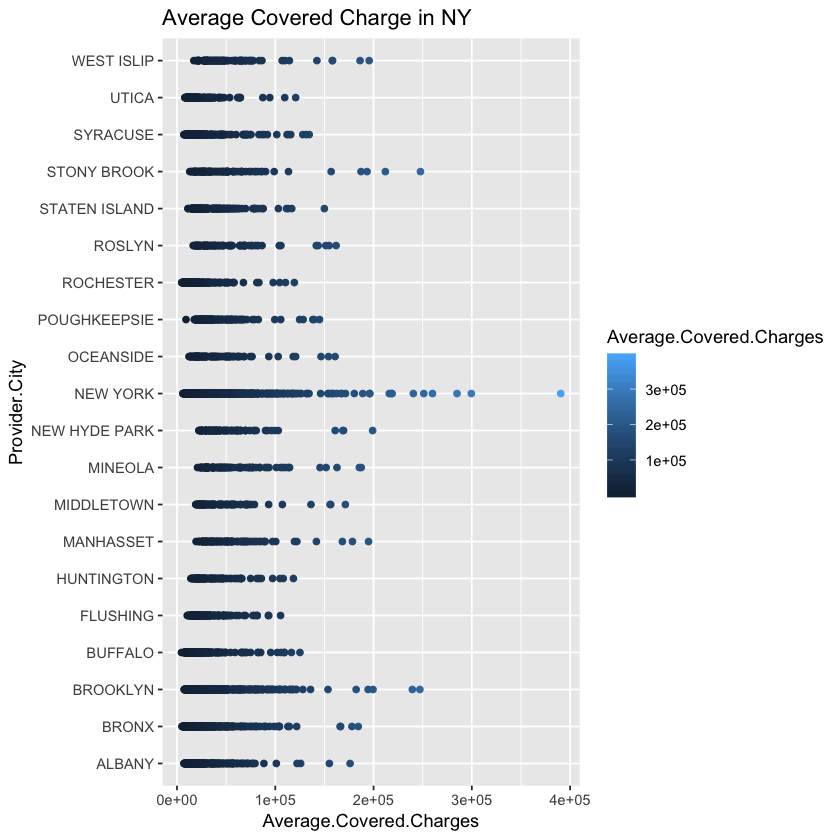

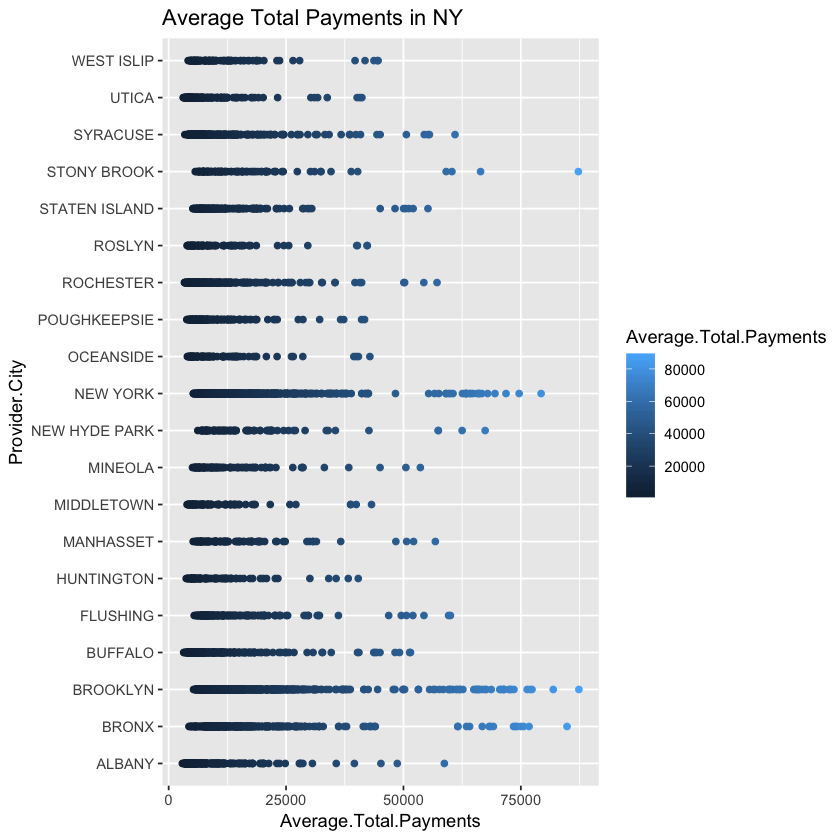

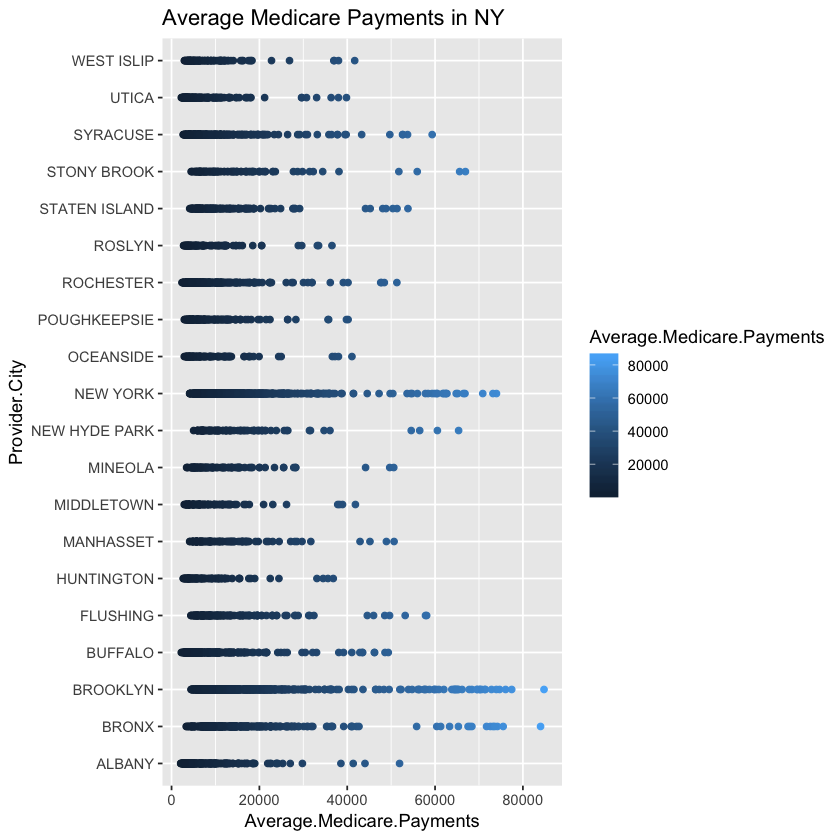

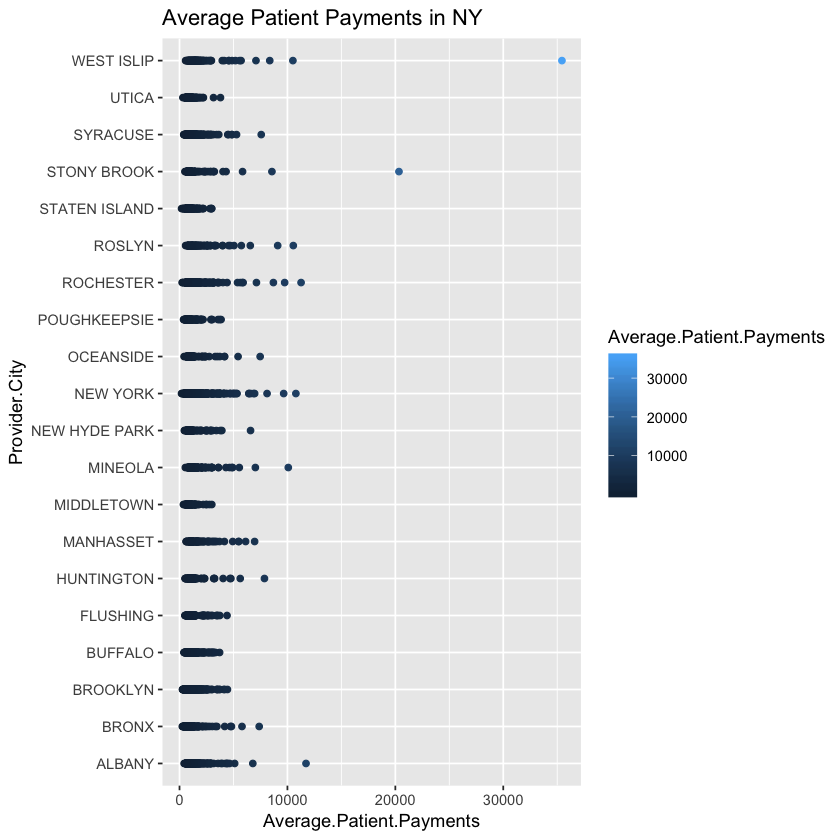

In [23]:
avg_cc_ny
avg_tp_ny
avg_mp_ny
avg_p_ny

In [24]:
# grouping by DRG and city_state
summary_stats_cityst_drg = summary_stats(data,c('DRG.Definition','city_state'))
summary_stats_cityst_drg = summary_stats_cityst_drg[order(summary_stats_cityst_drg$DRG.Definition,summary_stats_cityst_drg$city_state),]
head(summary_stats_cityst_drg, n = 5)
tail(summary_stats_cityst_drg, n = 5)

DRG.Definition,city_state,num_providers,total_discharges,avg_discharges,avg_covered_charge,avg_total_payments,avg_medicare_payments,avg_patient_payments
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"ABILENE,TX",2,98,49.0,29026.62,6406.110,4447.115,1958.995
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"ABINGTON,PA",1,17,17.0,40088.58,6881.350,5825.350,1056.000
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"AIKEN,SC",1,11,11.0,47898.54,6626.000,5808.540,817.460
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"AKRON,OH",2,55,27.5,22539.03,6656.875,5263.560,1393.315
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"ALABASTER,AL",1,18,18.0,31633.27,5658.330,4851.440,806.890


DRG.Definition,city_state,num_providers,total_discharges,avg_discharges,avg_covered_charge,avg_total_payments,avg_medicare_payments,avg_patient_payments
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
948 - SIGNS & SYMPTOMS W/O MCC,"YUKON,OK",1,11,11,17183.45,3854.36,3342.72,511.64
948 - SIGNS & SYMPTOMS W/O MCC,"YUMA,AZ",1,19,19,24444.89,4957.00,3803.68,1153.32
948 - SIGNS & SYMPTOMS W/O MCC,"ZANESVILLE,OH",1,52,52,11575.57,4242.48,3597.69,644.79
948 - SIGNS & SYMPTOMS W/O MCC,"ZEPHYRHILLS,FL",1,21,21,24691.14,3811.61,2778.80,1032.81
948 - SIGNS & SYMPTOMS W/O MCC,"ZION,IL",1,11,11,34116.09,8994.09,3916.09,5078.00


In [25]:
# looking closer into NY
summary_stats_ny = summary_stats(data_ny,c('DRG.Definition','city_state'))
summary_stats_ny = summary_stats_ny[order(summary_stats_ny$DRG.Definition,summary_stats_ny$city_state),]
head(summary_stats_ny)
tail(summary_stats_ny)

DRG.Definition,city_state,num_providers,total_discharges,avg_discharges,avg_covered_charge,avg_total_payments,avg_medicare_payments,avg_patient_payments
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"ALBANY,NY",2,109,54.5,16883.49,6472.765,5494.475,978.290
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"BINGHAMTON,NY",1,16,16.0,17173.12,5777.000,4649.000,1128.000
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"BRONX,NY",1,13,13.0,37429.92,13079.380,10280.760,2798.620
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"BROOKLYN,NY",2,27,13.5,25243.56,11314.850,10024.360,1290.490
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"BUFFALO,NY",2,38,19.0,19673.12,7414.595,5782.780,1631.815
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"COOPERSTOWN,NY",1,23,23.0,16593.95,9293.780,7284.860,2008.920


DRG.Definition,city_state,num_providers,total_discharges,avg_discharges,avg_covered_charge,avg_total_payments,avg_medicare_payments,avg_patient_payments
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
948 - SIGNS & SYMPTOMS W/O MCC,"VALHALLA,NY",1,26,26.0,39228.69,8322.340,7542.340,780.00
948 - SIGNS & SYMPTOMS W/O MCC,"VALLEY STREAM,NY",1,23,23.0,19553.91,4865.470,4037.130,828.34
948 - SIGNS & SYMPTOMS W/O MCC,"WATERTOWN,NY",1,16,16.0,15512.50,6252.000,5552.500,699.50
948 - SIGNS & SYMPTOMS W/O MCC,"WEST ISLIP,NY",1,70,70.0,31237.95,5433.850,4238.480,1195.37
948 - SIGNS & SYMPTOMS W/O MCC,"WHITE PLAINS,NY",1,74,74.0,14500.36,4705.310,3805.600,899.71
948 - SIGNS & SYMPTOMS W/O MCC,"YONKERS,NY",2,33,16.5,10634.64,6192.015,5451.515,740.50


**Findings:**<br>
We can see that the payments and number of discharges can also vary drastically across different cities in the same state. New York state paints a perfect example of such differences, where some cities, such as New York, have much higher discharge rates and total payments than other cities, such as, for instance, Cobleskill. The graphs of the top 20 cities in New York based on the number of discharges illustrate those differences and also show the presence of outliers for specific cities. This becomes especially interesting in fraud detection when comparing covered charges with total payments and actual medicare payments - different cities seem to peak in these variables.

**Lead 5 - Individual provider differences: by city & state combined and DRG**<br>
To take this a step further, I will now create additional features to explore how the individual proviers compare against those city and state benchmarks.

In [26]:
# exploring unique providers
summary_cityst_drg_pr = provider_stats(data,c('DRG.Definition','city_state','Provider.Id','Provider.Name'))
summary_cityst_drg_pr = summary_cityst_drg_pr[order(summary_cityst_drg_pr$DRG.Definition,summary_cityst_drg_pr$Provider.Id,summary_cityst_drg_pr$Provider.Name),]
head(summary_cityst_drg_pr, n = 5)
tail(summary_cityst_drg_pr, n = 5)

DRG.Definition,city_state,Provider.Id,Provider.Name,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,avg_actual_medicare_payments,avg_actual_patient_payments
<fct>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"DOTHAN,AL",10001,SOUTHEAST ALABAMA MEDICAL CENTER,91,32963.07,5777.24,4763.73,1013.51
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"BOAZ,AL",10005,MARSHALL MEDICAL CENTER SOUTH,14,15131.85,5787.57,4976.71,810.86
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"FLORENCE,AL",10006,ELIZA COFFEE MEMORIAL HOSPITAL,24,37560.37,5434.95,4453.79,981.16
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"BIRMINGHAM,AL",10011,ST VINCENT'S EAST,25,13998.28,5417.56,4129.16,1288.40
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"ALABASTER,AL",10016,SHELBY BAPTIST MEDICAL CENTER,18,31633.27,5658.33,4851.44,806.89


DRG.Definition,city_state,Provider.Id,Provider.Name,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,avg_actual_medicare_payments,avg_actual_patient_payments
<fct>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
948 - SIGNS & SYMPTOMS W/O MCC,"ROUND ROCK,TX",670041,SETON MEDICAL CENTER WILLIAMSON,23,26314.39,3806.86,3071.39,735.47
948 - SIGNS & SYMPTOMS W/O MCC,"SAN ANTONIO,TX",670055,METHODIST STONE OAK HOSPITAL,11,21704.72,4027.36,2649.72,1377.64
948 - SIGNS & SYMPTOMS W/O MCC,"KYLE,TX",670056,SETON MEDICAL CENTER HAYS,19,39121.73,5704.36,4058.36,1646.00
948 - SIGNS & SYMPTOMS W/O MCC,"SUNNYVALE,TX",670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,11,28873.09,7663.09,6848.54,814.55
948 - SIGNS & SYMPTOMS W/O MCC,"FLOWER MOUND,TX",670068,TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND,12,15042.00,3539.75,2887.41,652.34


In [27]:
#joining the dataframes and adding differences for individual providers
joined_summary_cityst_drg_pr = summary_cityst_drg_pr  %>% 
left_join(summary_stats_cityst_drg, by = c("city_state" = 'city_state', 'DRG.Definition' = 'DRG.Definition'))

summary_cityst_drg_pr = joined_summary_cityst_drg_pr  %>% 
mutate(diff_covered_charges = avg_actual_covered_charge - avg_covered_charge,
       diff_total_payment = avg_actual_total_payments - avg_total_payments,
       diff_medicare_payment = avg_actual_medicare_payments - avg_medicare_payments,
      diff_patient_payment = avg_actual_patient_payments - avg_patient_payments)

In [28]:
summary_cityst_drg_pr = summary_cityst_drg_pr  %>% 
select(-c(total_discharges,avg_discharges,avg_covered_charge,avg_total_payments,avg_medicare_payments,avg_patient_payments,num_providers))

summary_cityst_drg_pr = summary_cityst_drg_pr[order(-summary_cityst_drg_pr$diff_total_payment),] #ordering to see the
#largest differences

head(summary_cityst_drg_pr, n =10)
tail(summary_cityst_drg_pr, n =10)

DRG.Definition,city_state,Provider.Id,Provider.Name,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,avg_actual_medicare_payments,avg_actual_patient_payments,diff_covered_charges,diff_total_payment,diff_medicare_payment,diff_patient_payment
<fct>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,"CROWN POINT,IN",150166,PINNACLE HOSPITAL,14,225729.14,131187.35,130466.57,720.78,81060.570,53854.37,55410.865,-1556.49500
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,"BALTIMORE,MD",210009,"JOHNS HOPKINS HOSPITAL, THE",14,100750.07,95868.64,66425.14,29443.50,46403.498,44409.38,20012.477,24396.90273
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,"CHICAGO,IL",140182,ADVOCATE ILLINOIS MASONIC MEDICAL CENTER,14,177633.21,85987.00,44137.50,41849.50,46760.243,42088.07,4411.441,37676.63313
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,"PORTLAND,OR",380009,OHSU HOSPITAL AND CLINICS,32,211535.21,94904.21,93618.96,1285.25,93748.460,40105.04,44672.473,-4567.43250
870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,"LOS ANGELES,CA",50262,RONALD REAGAN UCLA MEDICAL CENTER,29,375878.20,103802.96,101717.82,2085.14,36447.030,38058.41,38072.360,-13.94857
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,"LOS ANGELES,CA",50625,CEDARS-SINAI MEDICAL CENTER,38,596878.02,90466.26,88656.47,1809.79,335605.196,37385.48,36920.656,464.82875
377 - G.I. HEMORRHAGE W MCC,"BROOKLYN,NY",330350,UNIVERSITY HOSPITAL OF BROOKLYN ( DOWNSTATE ),25,114716.72,61176.80,58726.32,2450.48,63141.552,36377.35,34730.986,1646.36692
247 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W/O MCC,"SIOUX FALLS,SD",430095,AVERA HEART HOSPITAL OF SOUTH DAKOTA LLC,121,43844.23,83484.14,9316.11,74168.03,3256.715,35537.86,-921.565,36459.42500
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,"COLUMBIA,SC",420086,PALMETTO HEALTH BAPTIST,26,271209.38,99307.30,95684.76,3622.54,40290.867,35047.98,33847.447,1200.53667


DRG.Definition,city_state,Provider.Id,Provider.Name,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,avg_actual_medicare_payments,avg_actual_patient_payments,diff_covered_charges,diff_total_payment,diff_medicare_payment,diff_patient_payment
<fct>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,"SAN JOSE,CA",50380,GOOD SAMARITAN HOSPITAL,20,352359.10,42857.35,41540.90,1316.45,9267.697,-22892.81,-19426.120,-3466.6867
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,"BRONX,NY",330316,NEW YORK WESTCHESTER SQUARE MEDICAL CENTER,24,75369.20,42842.16,41209.33,1632.83,-18466.724,-23281.61,-23359.524,77.9120
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,"COLUMBIA,SC",420026,SISTERS OF CHARITY PROVIDENCE HOSPITALS,16,108158.93,32927.37,30590.93,2336.44,-110918.270,-23743.93,-22446.940,-1296.9900
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,"WASHINGTON,DC",90006,PROVIDENCE HOSPITAL,35,78215.37,42456.08,40698.57,1757.51,-94305.608,-23981.61,-21318.743,-2662.8700
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,"MINNEAPOLIS,MN",240057,ABBOTT NORTHWESTERN HOSPITAL,61,156945.67,40804.67,37249.37,3555.30,-39559.547,-25069.10,-26211.693,1142.5967
870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,"LOS ANGELES,CA",50742,OLYMPIA MEDICAL CENTER,130,374754.04,39984.89,38180.88,1804.01,35322.870,-25759.66,-25464.580,-295.0786
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,"READING,PA",390044,READING HOSPITAL MEDICAL CENTER,117,31485.56,9842.23,8687.55,1154.68,3471.310,-31477.85,484.730,-31962.5800
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,"COLUMBIA,SC",420026,SISTERS OF CHARITY PROVIDENCE HOSPITALS,28,126970.46,32527.32,31453.85,1073.47,-103948.053,-31732.00,-30383.463,-1348.5333
247 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W/O MCC,"SIOUX FALLS,SD",430027,SANFORD USD MEDICAL CENTER,183,37330.80,12408.42,11159.24,1249.18,-3256.715,-35537.86,921.565,-36459.4250


**Findings**<br>
As we can see, once again both the number of discharges and the payments vary drastically across providers in different cities. Let's note that some values for the deltas are 0. Upon further investigation, this is the case for cities that only have 1 provider listed in the given dataset, making the delta between the averages 0.

These features are helpful in identifying the potential fraudulent acitivity in providers, as we have further narrowed down the search by focusing on individual cities across states and how the payments vary.

**Conclusion:**<br>
Based on my analysis, there are a number of factors that are worth looking into when detecting fraud in healthcare. I created a number of features for individual medican diagnosis and specific locations across the US to understand where the outliers might lie. These outliers are then worth investigating further.

Nevertheless, as we've learned from our readings this week, healthcare fraud can be of varying kinds and in order to better determine it, we could think of the following improvements for future iterations:
- look into individual patient data
- look into individual physicians and prescription data
- look into latitude and longitude data and create city clusters
- look into individual zip codes once patterns in cities are identified

# Part 2: Clustering
Based on the feedback we received in class, I will now go back to reflect on the features that I created, revise them where necessary, and then move onto clustering in order to be able to identify suspicious providers that might be involved in waste and abuse.

**Lead 1: Difference in discharges** <br>
First, I will add a feature to reflect the differences in number of total discharges for a particular DRG for a particular provider, as compared to the average for the DRG is the city for the particular state. I decided to proceed with the city_state level, as we saw in my previous analysis that payments and discharges can vary drastically from city to city within the same state (e.g. urban vs suburban areas).

In [31]:
#creating the new dataframe with the additional variable
summary_cityst_df = joined_summary_cityst_drg_pr  %>% 
mutate(diff_num_discharges = avg_actual_discharges - avg_discharges,
       diff_covered_charges = avg_actual_covered_charge - avg_covered_charge,
       diff_total_payment = avg_actual_total_payments - avg_total_payments,
       diff_medicare_payment = avg_actual_medicare_payments - avg_medicare_payments,
       diff_patient_payment = avg_actual_patient_payments - avg_patient_payments)

#removing columns not needed in further analysis
summary_cityst_df = summary_cityst_df  %>% 
select(-c(total_discharges,avg_discharges,avg_covered_charge,avg_total_payments,avg_medicare_payments,avg_patient_payments,num_providers))

summary_cityst_df = summary_cityst_df[order(-summary_cityst_df$diff_total_payment),] #ordering to see the
#largest differences

head(summary_cityst_df, n =10)
tail(summary_cityst_df, n =10)

DRG.Definition,city_state,Provider.Id,Provider.Name,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,avg_actual_medicare_payments,avg_actual_patient_payments,diff_num_discharges,diff_covered_charges,diff_total_payment,diff_medicare_payment,diff_patient_payment
<fct>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,"CROWN POINT,IN",150166,PINNACLE HOSPITAL,14,225729.14,131187.35,130466.57,720.78,0.500000,81060.570,53854.37,55410.865,-1556.49500
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,"BALTIMORE,MD",210009,"JOHNS HOPKINS HOSPITAL, THE",14,100750.07,95868.64,66425.14,29443.50,-20.181818,46403.498,44409.38,20012.477,24396.90273
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,"CHICAGO,IL",140182,ADVOCATE ILLINOIS MASONIC MEDICAL CENTER,14,177633.21,85987.00,44137.50,41849.50,-5.125000,46760.243,42088.07,4411.441,37676.63313
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,"PORTLAND,OR",380009,OHSU HOSPITAL AND CLINICS,32,211535.21,94904.21,93618.96,1285.25,7.500000,93748.460,40105.04,44672.473,-4567.43250
870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,"LOS ANGELES,CA",50262,RONALD REAGAN UCLA MEDICAL CENTER,29,375878.20,103802.96,101717.82,2085.14,-23.000000,36447.030,38058.41,38072.360,-13.94857
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,"LOS ANGELES,CA",50625,CEDARS-SINAI MEDICAL CENTER,38,596878.02,90466.26,88656.47,1809.79,16.000000,335605.196,37385.48,36920.656,464.82875
377 - G.I. HEMORRHAGE W MCC,"BROOKLYN,NY",330350,UNIVERSITY HOSPITAL OF BROOKLYN ( DOWNSTATE ),25,114716.72,61176.80,58726.32,2450.48,-5.307692,63141.552,36377.35,34730.986,1646.36692
247 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W/O MCC,"SIOUX FALLS,SD",430095,AVERA HEART HOSPITAL OF SOUTH DAKOTA LLC,121,43844.23,83484.14,9316.11,74168.03,-31.000000,3256.715,35537.86,-921.565,36459.42500
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,"COLUMBIA,SC",420086,PALMETTO HEALTH BAPTIST,26,271209.38,99307.30,95684.76,3622.54,-1.000000,40290.867,35047.98,33847.447,1200.53667


DRG.Definition,city_state,Provider.Id,Provider.Name,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,avg_actual_medicare_payments,avg_actual_patient_payments,diff_num_discharges,diff_covered_charges,diff_total_payment,diff_medicare_payment,diff_patient_payment
<fct>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,"SAN JOSE,CA",50380,GOOD SAMARITAN HOSPITAL,20,352359.10,42857.35,41540.90,1316.45,2.333333,9267.697,-22892.81,-19426.120,-3466.6867
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,"BRONX,NY",330316,NEW YORK WESTCHESTER SQUARE MEDICAL CENTER,24,75369.20,42842.16,41209.33,1632.83,-21.600000,-18466.724,-23281.61,-23359.524,77.9120
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,"COLUMBIA,SC",420026,SISTERS OF CHARITY PROVIDENCE HOSPITALS,16,108158.93,32927.37,30590.93,2336.44,-4.333333,-110918.270,-23743.93,-22446.940,-1296.9900
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,"WASHINGTON,DC",90006,PROVIDENCE HOSPITAL,35,78215.37,42456.08,40698.57,1757.51,1.750000,-94305.608,-23981.61,-21318.743,-2662.8700
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,"MINNEAPOLIS,MN",240057,ABBOTT NORTHWESTERN HOSPITAL,61,156945.67,40804.67,37249.37,3555.30,26.666667,-39559.547,-25069.10,-26211.693,1142.5967
870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,"LOS ANGELES,CA",50742,OLYMPIA MEDICAL CENTER,130,374754.04,39984.89,38180.88,1804.01,78.000000,35322.870,-25759.66,-25464.580,-295.0786
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,"READING,PA",390044,READING HOSPITAL MEDICAL CENTER,117,31485.56,9842.23,8687.55,1154.68,-13.000000,3471.310,-31477.85,484.730,-31962.5800
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,"COLUMBIA,SC",420026,SISTERS OF CHARITY PROVIDENCE HOSPITALS,28,126970.46,32527.32,31453.85,1073.47,1.000000,-103948.053,-31732.00,-30383.463,-1348.5333
247 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W/O MCC,"SIOUX FALLS,SD",430027,SANFORD USD MEDICAL CENTER,183,37330.80,12408.42,11159.24,1249.18,31.000000,-3256.715,-35537.86,921.565,-36459.4250


**Findings:**<br>
Based on this, we can now identify the hospitals that have higher or lower rates of discharges for the different DRGs, as compared to the city_state averages across providers. This can prove to be useful in identifying excessive practices of a particular DRG of a provider. Nevertheless, it is important to keep in mind that some providers specialize in specific DRGs, and, therefore, we also need to look at other factors before we make such claims.

**Lead 2: Data Normalization**<br>
Before proceeding with clustering, I need to normalize my data. I evaluated 2 options in particular: the preProcess function in the caret library or transforming the features I created for differences (deltas between actual and city_state average numbers) into ratios. I decided to go with the second approach - transforming my existing variables into ratios, as I believe this will aid interpritability when identifying suspicious clusters.

In [83]:
#creating the new dataframe with the additional variable
summary_cityst_df_new = joined_summary_cityst_drg_pr  %>% 
mutate(ratio_discharges = avg_actual_discharges/avg_discharges,
       ratio_covered_charges = avg_actual_covered_charge/avg_covered_charge,
       ratio_total_payment = avg_actual_total_payments/avg_total_payments,
       ratio_medicare_payment = avg_actual_medicare_payments/avg_medicare_payments,
       ratio_patient_payment = avg_actual_patient_payments/avg_patient_payments)

#removing columns not needed in further analysis
summary_cityst_df_new = summary_cityst_df_new  %>% 
select(-c(total_discharges,avg_discharges,avg_covered_charge,avg_total_payments,avg_medicare_payments,
          avg_patient_payments,num_providers,avg_actual_discharges,avg_actual_covered_charge,avg_actual_total_payments,
         avg_actual_medicare_payments,avg_actual_patient_payments))

head(summary_cityst_df_new, n =10)
tail(summary_cityst_df_new, n =10)

DRG.Definition,city_state,Provider.Id,Provider.Name,ratio_discharges,ratio_covered_charges,ratio_total_payment,ratio_medicare_payment,ratio_patient_payment
<fct>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"DOTHAN,AL",10001,SOUTHEAST ALABAMA MEDICAL CENTER,1.3382353,0.9084446,1.0378101,1.0387628,1.0333556
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"BOAZ,AL",10005,MARSHALL MEDICAL CENTER SOUTH,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"FLORENCE,AL",10006,ELIZA COFFEE MEMORIAL HOSPITAL,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"BIRMINGHAM,AL",10011,ST VINCENT'S EAST,0.8287293,0.3318296,0.9152083,0.8991998,0.9705864
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"ALABASTER,AL",10016,SHELBY BAPTIST MEDICAL CENTER,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"MONTGOMERY,AL",10023,BAPTIST MEDICAL CENTER SOUTH,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"OPELIKA,AL",10029,EAST ALABAMA MEDICAL CENTER AND SNF,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"BIRMINGHAM,AL",10033,UNIVERSITY OF ALABAMA HOSPITAL,1.0607735,0.8496140,1.3567265,1.2757951,1.6366930
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,"HUNTSVILLE,AL",10039,HUNTSVILLE HOSPITAL,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000


DRG.Definition,city_state,Provider.Id,Provider.Name,ratio_discharges,ratio_covered_charges,ratio_total_payment,ratio_medicare_payment,ratio_patient_payment
<fct>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
948 - SIGNS & SYMPTOMS W/O MCC,"KENOSHA,WI",520189,AURORA MED CTR KENOSHA,0.5384615,1.114599,1.0891749,1.0128336,1.313669
948 - SIGNS & SYMPTOMS W/O MCC,"GILLETTE,WY",530002,CAMPBELL COUNTY MEMORIAL HOSPITAL,1.0000000,1.000000,1.0000000,1.0000000,1.000000
948 - SIGNS & SYMPTOMS W/O MCC,"CASPER,WY",530012,WYOMING MEDICAL CENTER,1.0000000,1.000000,1.0000000,1.0000000,1.000000
948 - SIGNS & SYMPTOMS W/O MCC,"CHEYENNE,WY",530014,CHEYENNE REGIONAL MEDICAL CENTER,1.0000000,1.000000,1.0000000,1.0000000,1.000000
948 - SIGNS & SYMPTOMS W/O MCC,"CYPRESS,TX",670024,NORTH CYPRESS MEDICAL CENTER,1.0000000,1.000000,1.0000000,1.0000000,1.000000
948 - SIGNS & SYMPTOMS W/O MCC,"ROUND ROCK,TX",670041,SETON MEDICAL CENTER WILLIAMSON,1.0000000,1.000000,1.0000000,1.0000000,1.000000
948 - SIGNS & SYMPTOMS W/O MCC,"SAN ANTONIO,TX",670055,METHODIST STONE OAK HOSPITAL,0.2235772,1.015350,0.8339387,0.6966377,1.343069
948 - SIGNS & SYMPTOMS W/O MCC,"KYLE,TX",670056,SETON MEDICAL CENTER HAYS,1.0000000,1.000000,1.0000000,1.0000000,1.000000
948 - SIGNS & SYMPTOMS W/O MCC,"SUNNYVALE,TX",670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,1.0000000,1.000000,1.0000000,1.0000000,1.000000


In [84]:
#checking for NAs that might have been introducted in the last step
NAs_2 = NA_prcnt(summary_cityst_df_new)
NAs_2

ratio_patient_payment         DRG.Definition             city_state 
          0.0006132524           0.0000000000           0.0000000000 
           Provider.Id          Provider.Name       ratio_discharges 
          0.0000000000           0.0000000000           0.0000000000 
 ratio_covered_charges    ratio_total_payment ratio_medicare_payment 
          0.0000000000           0.0000000000           0.0000000000

In [85]:
# replacing resulting NAs with 0, where the ratios tried to divide by 0
summary_cityst_df_new[is.na(summary_cityst_df_new$ratio_patient_payment),]$ratio_patient_payment = 0

**Findings:**<br>
The variables with the ratios help give a more standardized view of the data, which will be very helpful in the next step when I move onto clustering, as all data has now been normalized. There seemed to be one or two NAs introduced in the process, which I attributed to the fact that there was division by 0 for specific cities in specific states. Therefore, I decided to replace those with 0, as they will also not likely be the FWA (Fraud, Waste, Abuse) providers due to the 0s in their treatment data.

**Lead 3: K-Means Clustering**<br>
Because the purpose of this project is primarily EDA and no predictions, I saw no need to split the data into train and test sets and I worked on the entire dataset.

I will use K-Means for my clustering and I will try out running it with 5-10 clusters. Once I run the models, I will look into the differentiation between clusters and cluster sizes to determine whether a particular cluster looks suspicious.

In [126]:
#starting with 5 clusters
set.seed(617)
k_5 = kmeans(summary_cityst_df_new[,c('ratio_discharges', 'ratio_covered_charges','ratio_total_payment',
                                      'ratio_medicare_payment', 'ratio_patient_payment')], centers=5)

In [139]:
k_5[7]
k_5[2]

$size
[1] 121116   5548  14397  19957   2047

ratio_discharges,ratio_covered_charges,ratio_total_payment,ratio_medicare_payment,ratio_patient_payment
0.9982328,1.0015231,0.9994803,1.0000400,0.9965527
0.8983644,1.1047392,1.1088817,0.9875364,1.7560219
1.4794209,0.9804344,0.9824560,0.9877607,0.9730175
0.5492675,0.9624911,0.9844384,1.0126017,0.8147540
2.4025212,1.1293064,1.0107517,0.9946388,1.1502390


In [109]:
# 6 clusters
set.seed(617)
k_6 = kmeans(summary_cityst_df_new[,c('ratio_discharges', 'ratio_covered_charges','ratio_total_payment',
                                      'ratio_medicare_payment', 'ratio_patient_payment')], centers=6)

In [138]:
k_6[7]
k_6[2]

$size
[1]   4652  14101 118393   1989  11133  12797

ratio_discharges,ratio_covered_charges,ratio_total_payment,ratio_medicare_payment,ratio_patient_payment
0.9523783,1.1023560,1.1192583,0.9881611,1.8241294
1.4859899,0.9835218,0.9840967,0.9882214,0.9791989
1.0016911,1.0008373,0.9999079,0.9996037,1.0013960
2.4161388,1.1297624,1.0100193,0.9947922,1.1447478
0.6738549,0.8309414,0.9337153,0.9869255,0.6374529
0.5297846,1.1001093,1.0311313,1.0331332,1.0032452


In [111]:
# 7 clusters
set.seed(617)
k_7 = kmeans(summary_cityst_df_new[,c('ratio_discharges', 'ratio_covered_charges','ratio_total_payment',
                                      'ratio_medicare_payment', 'ratio_patient_payment')], centers=7)

In [137]:
k_7[7]
k_7[2]

$size
[1]   1895   8015   7378   4596 116034  12887  12260

ratio_discharges,ratio_covered_charges,ratio_total_payment,ratio_medicare_payment,ratio_patient_payment
2.4412401,1.1292426,1.0087346,0.9950772,1.1360803
0.6262571,1.2851787,1.0804579,1.1041241,0.9230781
1.0279340,0.9010803,0.9298952,1.0015849,0.5707736
0.9093935,1.0965410,1.1179551,0.9855218,1.8249663
1.0002568,0.9982179,0.9995007,0.9981360,1.0067584
1.5049100,0.9978200,0.9936150,0.9873708,1.0415827
0.5055597,0.8360830,0.9554575,0.9680805,0.8705437


In [113]:
# 8 clusters
set.seed(617)
k_8 = kmeans(summary_cityst_df_new[,c('ratio_discharges', 'ratio_covered_charges','ratio_total_payment',
                                      'ratio_medicare_payment', 'ratio_patient_payment')], centers=8)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 8153250)”

In [136]:
k_8[7]
k_8[2]

$size
[1]   1903   8113   6781  11136  11416 114972   2316   6428

ratio_discharges,ratio_covered_charges,ratio_total_payment,ratio_medicare_payment,ratio_patient_payment
2.4358025,1.1329545,1.0103660,0.9953690,1.1438454
0.7931019,0.8752197,0.9260817,0.9942886,0.5592637
0.6597554,1.3237839,1.0935751,1.1220027,0.9082774
1.5035555,0.9562217,0.9708779,0.9858923,0.9037230
0.4989635,0.8738975,0.9734883,0.9688371,0.9886027
1.0005123,0.9972291,0.9988861,0.9984728,1.0010846
0.7776238,1.1187600,1.1580946,0.9883149,2.0649429
1.2834158,1.0831335,1.0520105,0.9911880,1.3942238


In [115]:
# 9 clusters
set.seed(617)
k_9 = kmeans(summary_cityst_df_new[,c('ratio_discharges', 'ratio_covered_charges','ratio_total_payment',
                                      'ratio_medicare_payment', 'ratio_patient_payment')], centers=9)

Warning message:
“did not converge in 10 iterations”

In [135]:
k_9[7]
k_9[2]

$size
[1]   1749   6908  10977   5623 114379    899   6616   5428  10486

ratio_discharges,ratio_covered_charges,ratio_total_payment,ratio_medicare_payment,ratio_patient_payment
2.4747545,1.1318649,1.0077611,0.9948695,1.1254040
0.6433502,1.3035518,1.0861464,1.1212894,0.8653164
0.4985301,0.8366409,0.9576231,0.9794442,0.8200331
0.6575900,1.0062739,1.0255286,0.9490600,1.4134538
1.0011230,0.9978824,0.9990897,0.9987478,1.0010068
0.9020585,1.1874756,1.2391094,1.0129835,2.5569621
1.0017456,0.8911126,0.9211496,0.9916878,0.5679408
1.3222697,1.1112464,1.0694015,1.0058040,1.4267958
1.5257649,0.9638158,0.9758795,0.9845727,0.9416080


**Findings:**<br>
I ran K-means with no issues from 5 up to 7 clusters, however, as I moved onto higher number of clusters, I started receiving warning messages. Upon further investigation, I found those warnings meant that some of the points (rows of ‘x’) were extremely close and the K-means algorithm was having trouble converging in different stages. Based on this, I will only look into the models resulting in 5, 6, and 7 clusters, as they seem to be the more reliable ones.

I then went back and looked into the individual clusters to be able to understand the different patterns among clusters with the goal of identifying suspicious clusters that might contain FWA (Fraud, Waste, Abuse) providers.

The models yielded rather interesting results. There was 1 cluster, in particular, that stood out across all models based on the abnormally high number of discharges as compared to the city_state average. In the end, I decided to go with the model resulting in 7 clusters (k_7) because it had a narrowed down number of observations in the segment I found to be suspicious when compared to the other clusters, while also showing enough differentiation within the clusters.

For model k_7, the cluster I found to be most suspicious was cluster 1, in particular. It stood out based on a ratio of 2.44 in number of discharges, which is far above the average for the city_state discharge averages. This raises suspicion that some providers in this cluster might be FWA providers and deserve more indepth investigation. Looking closer, cluster 1 is also the smallest cluster that was formed and consists of only 1895 observations, which is about 1.2% of all the data. Therefore, this could indeed be a cluster that containt FWA providers that can be considered the anomalies in this case. This, of course, does not immediately mean that every provider in this cluster is fraudulent, however, the cluster might be worth looking into. Based on this, I would suggest to investigate the providers in cluster 1 further, as there could be some FWA providers with excessive practices for some DRGs in this cluster, which made them differentiate so much from the city_state averages.

**Conclusion:**<br>
This clustering technique was very helpful in better understanding the differences among providers acrosss cities and states and different DRGs. By clustering the providers, I was able to identify groups of providers that looked suspicious, without having to spend too much time looking through the data of individual providers in the US.

As a next step, I think it would be interesting to plot the clusters across the different variables that I used in clustering to see what they look like visually. Since I'm dealing with multi-variate clusters, this can sometimes get tricky. Therefore, one way to do that would be to perform PCA, which will help narrow down the most important factors, and then plot that on a two-dimensional plot.